# COVID-19 Research Papers LDA Topic Modeling

Use the LDA model to create topics, or clusters, present in the dataset using the abstracts of the papers. Each topic corresponds to a set of word-probability pairs, and I chose to use the top 15 highest probability words of each topic to represent the given topic. Each paper is assigned a topic based on how many of the top 15 words of each topic are included in the abstract, and how often.

In [1]:
import numpy as np
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import nltk
from nltk.stem.snowball import SnowballStemmer
#from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

import re

import gensim
from gensim import corpora, models

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jayfeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jayfeng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jayfeng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
unable to import 'smart_open.gcs', disabling that module


In [2]:
"""Reads in abstracts.csv and filters out rows with missing values."""

df = pd.read_csv("abstracts.csv")
df = df[df["abstract"] != "NaN"]
df = df.dropna()

In [3]:
"""Set up stop words, stemmer, and lemmatizer."""

stop_words = set(stopwords.words('english')) 
snowBallStemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

In [4]:
"""Tokenize and clean the abstracts of every paper."""

def tokenize_clean(abstract):
    #tokenizes abstract string
    tokens = word_tokenize(abstract.lower())
    
    #lemmatizes tokens
    counter = 0
    while counter < len(tokens):
        tokens[counter] = lemmatizer.lemmatize(tokens[counter])
        counter += 1
    
    #filters, stems, and lowercases tokens
    filtered_tokens = []
    for i in tokens:
        if i not in stop_words and len(i) > 3 and i != "abstract":
            stemmed_word = snowBallStemmer.stem(i)
            filtered_tokens.append(stemmed_word)
    
    return filtered_tokens

df["abstract tokens"] = df.apply(lambda row: tokenize_clean(row.abstract), axis=1)

In [5]:
"""Perform LDA topic modelling on a sample of the papers for speed purposes."""

partial_df = df#.sample(3000)

In [6]:
"""Create a list of lists of cleaned tokens of abstracts"""

partial_texts = []
for index, row in partial_df.iterrows():
    partial_texts.append(row[3])

In [7]:
"""Use gensim package to perform LDA topic modelling.
Code from https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
used for reference.
"""

dictionary = corpora.Dictionary(partial_texts)
dictionary.filter_extremes(no_below=3)

corpus = [dictionary.doc2bow(text) for text in partial_texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=50)

In [8]:
lda_results = ldamodel.show_topics(num_topics=10, num_words=15, formatted=False)
lda_results

[(0,
  [('protein', 0.038586833),
   ('activ', 0.019865325),
   ('structur', 0.011712853),
   ('bind', 0.011035925),
   ('target', 0.008744715),
   ('use', 0.008048833),
   ('inhibit', 0.008004663),
   ('membran', 0.007904691),
   ('cell', 0.007605853),
   ('interact', 0.0075338944),
   ('domain', 0.007353939),
   ('sars-cov', 0.0070607043),
   ('peptid', 0.006923177),
   ('acid', 0.006641288),
   ('inhibitor', 0.0065830806)]),
 (1,
  [('covid-19', 0.024055839),
   ('case', 0.015231695),
   ('model', 0.012536577),
   ('outbreak', 0.011185631),
   ('health', 0.0106886765),
   ('china', 0.009818465),
   ('data', 0.009470776),
   ('epidem', 0.0093959505),
   ('number', 0.007944681),
   ('use', 0.007469566),
   ('rate', 0.0071795415),
   ('wuhan', 0.0070640207),
   ('result', 0.0070273657),
   ('measur', 0.0065550823),
   ('time', 0.006529428)]),
 (2,
  [('diseas', 0.021708762),
   ('develop', 0.013868811),
   ('health', 0.010318901),
   ('system', 0.009344235),
   ('review', 0.008943776),

In [9]:
"""Create topic_words, a list of buckets of words that represent each topic."""

topic_words = []
#i is each topic
for i in lda_results:
    topic_i_words = []
    word_pairs = i[1]
    #j is the list of word-probability pairs (we don't care about the probabilities here)
    for j in word_pairs:
        topic_i_words.append(j[0])
    topic_words.append(topic_i_words)
        
topic_words   

[['protein',
  'activ',
  'structur',
  'bind',
  'target',
  'use',
  'inhibit',
  'membran',
  'cell',
  'interact',
  'domain',
  'sars-cov',
  'peptid',
  'acid',
  'inhibitor'],
 ['covid-19',
  'case',
  'model',
  'outbreak',
  'health',
  'china',
  'data',
  'epidem',
  'number',
  'use',
  'rate',
  'wuhan',
  'result',
  'measur',
  'time'],
 ['diseas',
  'develop',
  'health',
  'system',
  'review',
  'research',
  'emerg',
  'human',
  'pathogen',
  'includ',
  'provid',
  'potenti',
  'infecti',
  'approach',
  'vaccin'],
 ['virus',
  'sequenc',
  'gene',
  'genom',
  'strain',
  'analysi',
  'viral',
  'speci',
  'genet',
  'isol',
  'human',
  'coronavirus',
  'differ',
  'identifi',
  'mutat'],
 ['virus',
  'detect',
  'sampl',
  'use',
  'test',
  'assay',
  'method',
  'infect',
  'result',
  'viral',
  'sensit',
  'posit',
  'pedv',
  'specif',
  'pathogen'],
 ['cell',
  'infect',
  'virus',
  'viral',
  'express',
  'respons',
  'host',
  'replic',
  'immun',
  'ro

In [10]:
"""Assign a topic to each of the papers."""

assigned_topic = []
for index, row in partial_df.iterrows():
    tokens = row["abstract tokens"]
    counter_array = [0] * 15
    for i in tokens:
        for j in np.arange(10):
            if i in topic_words[j]:
                counter_array[j] += 1
    max_topic = counter_array.index(max(counter_array))
    assigned_topic.append(max_topic)
                
partial_df["assigned topic"] = assigned_topic
partial_df = partial_df.sort_values("assigned topic")
partial_df

,Unnamed: 0,sha,abstract,abstract tokens,assigned topic
11169,14111,eb60faa5390ed6225f47be23de4d9f42d852d84f,Abstract A non-prime site substituent and warh...,"[non-prim, site, substitu, warhead, combin, de...",0
3494,4926,80c1d869f81784f4b1d5a064b5751b2ee5f33f26,Abstract Heptad repeat regions (HR1 and HR2) a...,"[heptad, repeat, region, high, conserv, sequen...",0
3495,4927,793b90203f2d2abdc7ae32cf413579954f2278eb,Abstract The spike (S) protein of severe acute...,"[spike, protein, sever, acut, respiratori, syn...",0
3496,4928,a6529715bc34fce68e08780be0b80acdc823e744,Abstract Severe acute respiratory syndrome (SA...,"[sever, acut, respiratori, syndrom, sar, becom...",0
3497,4929,0ad114139585a123079f9d6658429b37457e6b07,Abstract The angiotensin converting enzyme 2 (...,"[angiotensin, convert, enzym, ace2, identifi, ...",0
...,...,...,...,...,...
5554,7412,3767c72c714d598a7668f1b53fd57db3383ce6ca,100 years after the infamous “Spanish flu” pan...,"[year, infam, spanish, pandem, 2017–2018, seas...",9
26729,44005,c8ca3a5306db10a7842b853031404ecbc0a363ed,Human metapneumovirus (HMPV) is an important v...,"[human, metapneumovirus, hmpv, import, viral, ...",9
10685,13515,60aa58e759985165053ddd6f154ea42518143056,Background/Purpose Detection of fever has beco...,"[background/purpos, detect, fever, becom, esse...",9
8076,10477,cced09f9a42aebacffd3847b8891ed5942687d7d,We aimed to identify the source of Staphylococ...,"[aim, identifi, sourc, staphylococcus, aureus,...",9


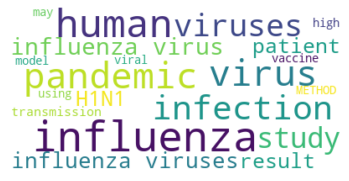

In [11]:
cluster3 = partial_df[partial_df["assigned topic"] == 9]
abstractStrings = cluster3.sample(100)["abstract"].values
wordCloudString = ""
for i in np.arange(100):
    wordCloudString += abstractStrings[i]
    
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(wordCloudString)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
partial_df.to_csv("document_clusters.csv")